### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [3]:
tf.__version__

'1.14.0'

### Collect Data

In [2]:
import keras

Using TensorFlow backend.


In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [11]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
import numpy as np
train_X = np.asarray(trainX, dtype=np.float32) / 255
test_X = np.asarray(testX, dtype=np.float32) / 255


In [0]:
train_X = tf.keras.utils.to_categorical(train_X,num_classes=10,dtype = 'float32')

In [0]:

test_X = tf.keras.utils.to_categorical(test_X
                              ,dtype = 'float32')

In [24]:
print(trainX.shape)
print('First 5 examples now are: ', trainX[0:5])

(60000, 28, 28)
('First 5 examples now are: ', array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
  

### Visualize the data

Plot first 10 images in the triaining set and their labels.

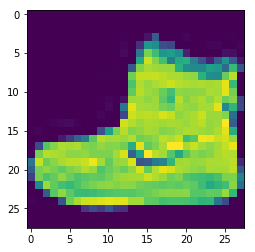

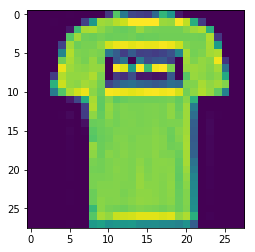

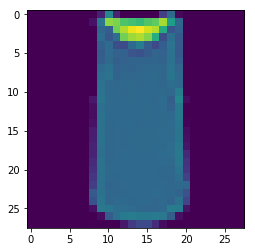

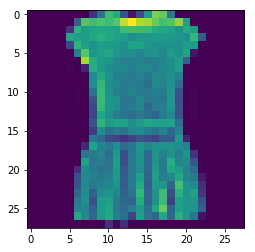

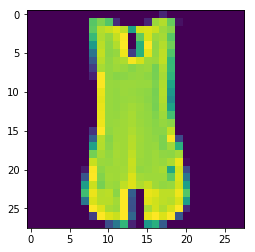

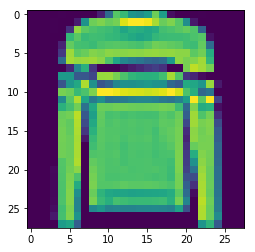

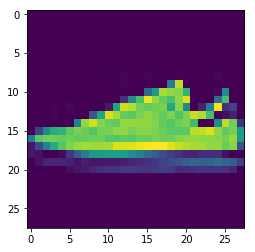

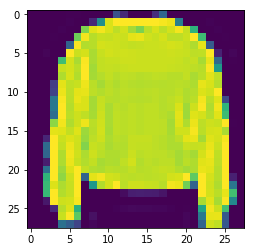

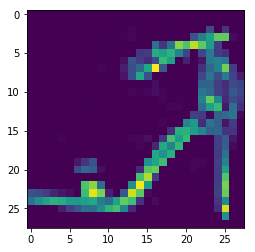

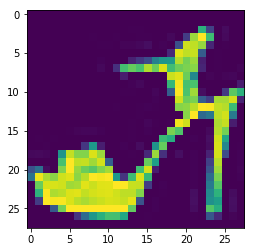

In [26]:
from matplotlib import pyplot as plt
for i in range(10):

  plt.figure()
  plt.imshow(trainX[i])


### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28, 10)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])




In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 7840)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1003648   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,004,938
Trainable params: 1,004,938
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Execute the model using model.fit()

In [39]:
import numpy as np
model.fit(np.array(train_X),  trainY, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 14s 302us/step - loss: 2.1752 - acc: 0.1879 - val_loss: 2.1359 - val_acc: 0.2426
Epoch 2/5
48000/48000 [==============================] - 14s 295us/step - loss: 2.1122 - acc: 0.2124 - val_loss: 2.0402 - val_acc: 0.2447
Epoch 3/5
48000/48000 [==============================] - 14s 299us/step - loss: 2.0692 - acc: 0.2319 - val_loss: 2.1268 - val_acc: 0.1752
Epoch 4/5
48000/48000 [==============================] - 14s 292us/step - loss: 2.0413 - acc: 0.2444 - val_loss: 1.9550 - val_acc: 0.3131
Epoch 5/5
48000/48000 [==============================] - 14s 294us/step - loss: 2.0089 - acc: 0.2585 - val_loss: 1.9654 - val_acc: 0.2787


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
from keras.layers import BatchNormalization

model.add(BatchNormalization())


### Execute the model

In [44]:
model.fit(np.array(train_X),  trainY, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 16s 336us/step - loss: 11.0894 - acc: 0.0994 - val_loss: 10.9806 - val_acc: 0.1027
Epoch 2/5
48000/48000 [==============================] - 15s 323us/step - loss: 11.0763 - acc: 0.0993 - val_loss: 10.9806 - val_acc: 0.1027
Epoch 3/5
48000/48000 [==============================] - 16s 325us/step - loss: 11.0763 - acc: 0.0993 - val_loss: 10.9806 - val_acc: 0.1027
Epoch 4/5
48000/48000 [==============================] - 16s 329us/step - loss: 11.0763 - acc: 0.0993 - val_loss: 10.9806 - val_acc: 0.1027
Epoch 5/5
48000/48000 [==============================] - 16s 328us/step - loss: 11.0763 - acc: 0.0993 - val_loss: 10.9806 - val_acc: 0.1027


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
from keras.optimizers import SGD

sgd = SGD(lr=0.01)

model.compile(optimizer= sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
model.fit(np.array(train_X),  trainY, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 17s 355us/step - loss: 11.0763 - acc: 0.0993 - val_loss: 10.9806 - val_acc: 0.1027
Epoch 2/5
48000/48000 [==============================] - 15s 321us/step - loss: 11.0763 - acc: 0.0993 - val_loss: 10.9806 - val_acc: 0.1027
Epoch 3/5
48000/48000 [==============================] - 15s 320us/step - loss: 11.0763 - acc: 0.0993 - val_loss: 10.9806 - val_acc: 0.1027
Epoch 4/5
48000/48000 [==============================] - 16s 324us/step - loss: 11.0763 - acc: 0.0993 - val_loss: 10.9806 - val_acc: 0.1027
Epoch 5/5
48000/48000 [==============================] - 16s 323us/step - loss: 11.0763 - acc: 0.0993 - val_loss: 10.9806 - val_acc: 0.1027


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28, 10)),
  keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])




In [0]:
from keras.optimizers import SGD

sgd = SGD(lr=0.01)

model_1.compile(optimizer= sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Review model

In [55]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 7840)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               784100    
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 795,210
Trainable params: 795,210
Non-trainable params: 0
_________________________________________________________________


### Run the model

In [56]:
model_1.fit(np.array(train_X),  trainY, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 13s 275us/step - loss: 2.3066 - acc: 0.1008 - val_loss: 2.3018 - val_acc: 0.1212
Epoch 2/5
48000/48000 [==============================] - 13s 262us/step - loss: 2.3020 - acc: 0.1071 - val_loss: 2.2992 - val_acc: 0.1022
Epoch 3/5
48000/48000 [==============================] - 12s 260us/step - loss: 2.2993 - acc: 0.1145 - val_loss: 2.2986 - val_acc: 0.1368
Epoch 4/5
48000/48000 [==============================] - 13s 260us/step - loss: 2.2961 - acc: 0.1232 - val_loss: 2.2966 - val_acc: 0.1022
Epoch 5/5
48000/48000 [==============================] - 13s 265us/step - loss: 2.2929 - acc: 0.1346 - val_loss: 2.2897 - val_acc: 0.1432
